# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from $\mathscr{N}(\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Overplot the true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

<br>
<br>
# Homework 1: Solutions

### Some useful definitions and functions

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

## Problem 2
Generate a sample of 10,000 data values drawn from N(1,0.2) and draw a pretty histogram, with the bin size determined using the Freedman-Diaconis rule. Overplot the true distribution.


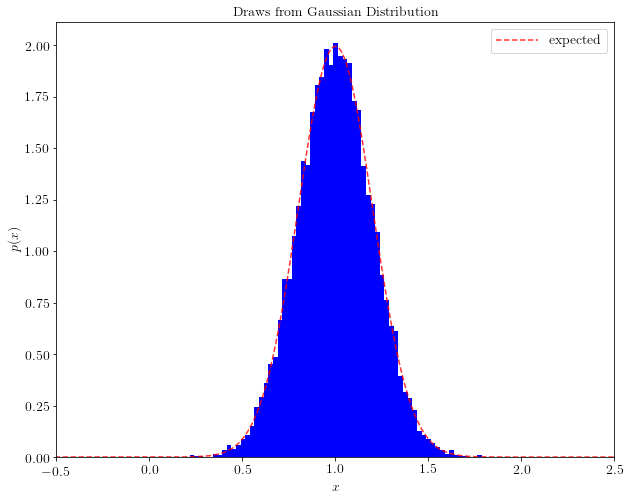

In [3]:
# 1) draw k=10,000 numbers from N(mu=1.0, sigma=0.2) 
np.random.seed(42)
k = 10000
mu = 1.0
sigma = 0.2
xData = norm(mu, sigma).rvs(k) # here we draw k numbers from N(mu, sigma)

#Now make a plot
fig, ax = plt.subplots(figsize=(10, 8))
#Histogram of the draws
fancyhist(xData, bins='freedman', color='blue', histtype='stepfilled', normed=True)

#Expected gaussian distribution
xGrid = np.linspace(-2, 4, 1000)
gaussPDF = norm(mu, sigma).pdf(xGrid)  # this is a function of x: gauss(x)
plt.plot(xGrid, gaussPDF, ls='--', c='red', label='expected', alpha = 0.8)

plt.xlim(-0.5, 2.5)
plt.xlabel('$x$')
plt.ylabel(r'$p(x)$')
plt.title('Draws from Gaussian Distribution')
plt.legend()

## Problem 3
Repeat Problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. 

Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment.

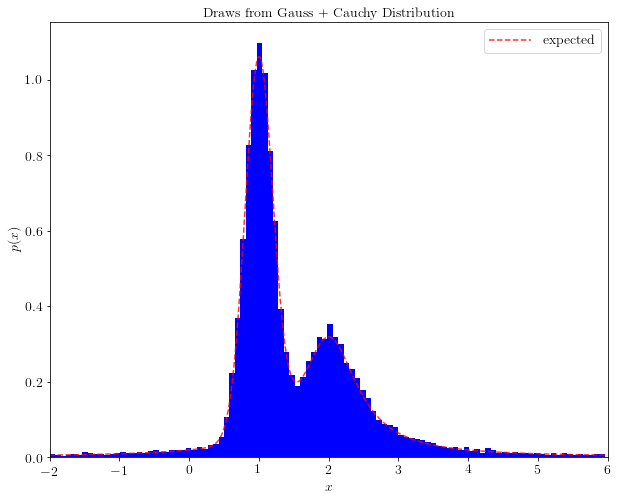

In [16]:
# draw k=10,000 numbers from N(mu=1.0, sigma=0.2) 
# and another k=10,000 numbers from Cauchy(mu=2.0, sigma=0.5) 
np.random.seed(42)
k1 = 10000
mu = 1.0
sigma = 0.2
xDataG = norm(mu, sigma).rvs(k1)  
k2 = 10000
mu2 = 2.0 
gamma = 0.5
xDataC = cauchy(mu2, gamma).rvs(k2)  
xDataC = xDataC[(xDataC > -2) & (xDataC < 6)] #Needed to make Scott sampling work out.
k = k1 + k2
xData = np.concatenate((xDataG, xDataC), axis=0)

## now plot the histogram of values
fig, ax = plt.subplots(figsize=(10, 8))

# expected distribution
xGrid = np.linspace(-2, 6, 1000)
gaussPDF = norm(mu, sigma).pdf(xGrid)   
cauchyPDF = cauchy(mu2, gamma).pdf(xGrid)  
expectedD = (k1*gaussPDF + k2*cauchyPDF)/k
plt.plot(xGrid, expectedD, ls='--', c='red', label='expected', alpha = 0.8)

#Histogram of the draws
fancyhist(xData, bins='freedman', color='blue', histtype='stepfilled', normed=True)


plt.xlim(-2.0, 6.0)
plt.xlabel('$x$')
plt.ylabel(r'$p(x)$')
plt.title('Draws from Gauss + Cauchy Distribution')
plt.legend()
plt.show()

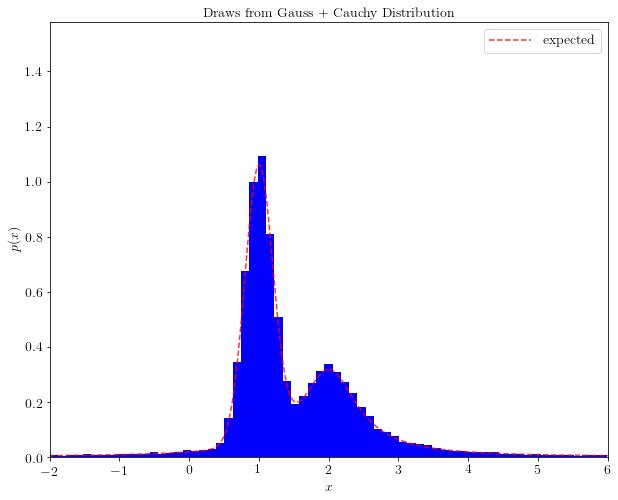

In [17]:
## now plot the histogram of values
fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(xGrid, expectedD, ls='--', c='red', label='expected', alpha = 0.8)

# histogram the data
fancyhist(xData, bins='scott', color='blue', histtype='stepfilled', normed=True)

plt.xlim(-2.0, 6.0)
yMax = 1.2/k * (k1/ np.sqrt(2*3.14) / sigma + k2/ 3.14 / gamma)
plt.ylim(0, yMax)
plt.xlabel('$x$')
plt.ylabel(r'$p(x)$')
plt.title('Draws from Gauss + Cauchy Distribution')
plt.legend()
plt.show()

Freedman and Scott similiar if limit the Cauchy part, otherwise Scott doesn't work.


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

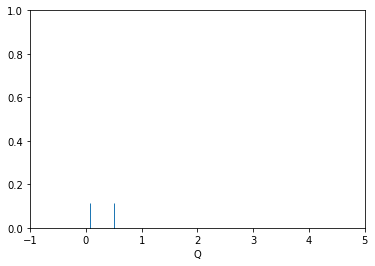

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N=2 # Complete
k=N # No constraints
mu=0 # Complete
sigma = 1 # Complete

Qplot = np.linspace(0, 20, 1000) # Complete

dist = norm(0,1) # mean = 0, stdev = 1
x = dist.rvs(N) #Complete
z = (x-mu)/sigma
zsq = np.power(z,2)
plt.plot(zsq, 0*zsq, '|', markersize=50)
plt.xlim(-1,5)
plt.ylim(0,1)
plt.xlabel('Q')

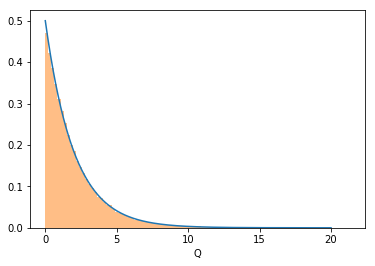

In [4]:
import scipy
chi2dist = np.power(Qplot,(k/2.-1))*np.exp(-Qplot/2.)/(np.power(2,k/2.)*scipy.special.gamma(k/2.))

plt.plot(Qplot, chi2dist) # Complete
plt.xlabel('Q')

# Add a histogram that is the mean of 1,000,000 draws
yy = np.empty(100000)
for i in range(100000):
    zsq = np.power(dist.rvs(N),2)
    Q = zsq.sum()
    yy[i] = Q

_ = plt.hist(yy,bins=100,histtype='stepfilled', alpha=0.5, normed=True)

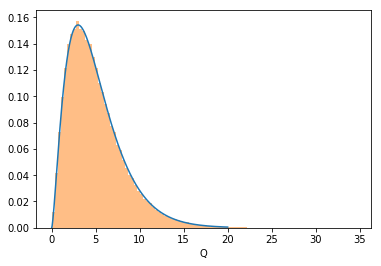

In [5]:
N=5
k=N
chi2dist = np.power(Qplot,(k/2.-1))*np.exp(-Qplot/2.)/(np.power(2,k/2.)*scipy.special.gamma(k/2.))

plt.plot(Qplot, chi2dist) # Complete
plt.xlabel('Q')

# Add a histogram that is the mean of 1,000,000 draws
yy = np.empty(100000)
for i in range(100000):
    zsq = np.power(dist.rvs(N),2)
    Q = zsq.sum()
    yy[i] = Q
    
_ = plt.hist(yy,bins=100,histtype='stepfilled', alpha=0.5, normed=True)

In [ ]:
Grading notes for HW1

1) 25
2) 25 (errors too)
3) 20 (no comment, but good use of "range")
4) 20 (used stats.chi2 instead of deriving).

1) 25
2) 20 (std=2 instead of 0.2)
3) 25 (Repeat of same problem above, but OK.  Commented OK).
4) 15 (Didn't compute Q, plotted t instead of chi2, but calc)

1) 25
2) 20 (double peaked for some reason)
3) 25 (good comment)
4) 20 (k=N)

1) 25
2) 25
3) 20 (concat problem)
4) 15 (Didn't compute Q, plotted t instead of chi2, but calc)

1) 25
2) 20 (theory curve wrong)
3) 20 (comment balances plot oddities)
4) 15 (Didn't compute Q, plotted t instead of chi2, but calc)

1) 25
2) 25
3) 25
4) 25

1) 23 (File name)
2) 25
3) 25
4) 20 (N=5 mismatch, number of bins)

1) 23 (File name)
2) 25
3) 23 (!normed)
4) 23 (number of bins)

1) 25
2) 25
3) 20 (concat problem)
4) 15 (Didn't compute Q, plotted t instead of chi2, but calc)

1) 20 (some sort of problem)
2) 20 (no theory)
3) 15 (plot probs, no comment)
4) 10 (just tried to plot stats.chi2)

1) 25
2) 25
3) 20 (other solns better)
4) 25 

1) 25
2) 25
3) 20 (other solns better)
4) 15 (stats.chi2, mismatch between data and model)

1) 25
2) 20 (wrong true dist, need xgrid instead of data)
3) 15 (a number of problems)
4) 10 (just plotted stats.chi2)

1) 25
2) 20 (wrong true dist, need xgrid instead of data)
3) 15 (a number of problems)
4) 10 (just plotted stats.chi2)

1) 25
2) 20 (wrong true dist)
3) 15 (a number of problems)
4) 5 (does not address question)

1) 25
2) 20 (no true dist)
3) 15 (a number of problems)
4) 0 (Supposed to turn in notebook if missed class)

1) 25
2) 20 (wrong true dist, need xgrid instead of data)
3) 15 (a number of problems)
4) 15 (Didn't compute Q, plotted t instead of chi2, but calc)

1) 25 
2) 20 (no theory)
3) 20 (no comment)
4) 10 (just plotted stats.chi2)

1) 15
2) 20 (no theory)
3) 10 (does not address question)
4) 5 (does not address question)

1)
2)
3)
4)

1) 20
2) 25
3) 20 (others better)
4) 15 (stats.chi2, mismatch between data and model)

1) 25
2) 25
3) 23 (vertical scaling)
4) 15 (stats.chi2, mismatch between data and model)